In [94]:
# Week 01 Homework Assignment
# Maya Deshpande

## Below is an exploration of Los Angeles' Great Streets Data, which surveys several LA neighborhoods for  pedestrian mobility, 
## economy, and overall community. I have plotted high-level information about the Hollywood neighborhood, such as the how often 
## people visit, how much time is generally spent during each visit, and how much money is generally spent each visit.

In [95]:
# Import pandas and geopandas libraries
import pandas as pd
import geopandas as gpd

# Read in CSV file and print a few lines of the dataframe.
ped_data = pd.read_csv('Great-Streets-Pedestrian-Survey-2015.csv')
ped_data.head()

,ID,Surveyed Date,Surveyed Time,Surveyed End Date,Q1. What brings you to this neighborhood today?,Q2. How often do you visit the neighborhood?,Q3. How much time do you typically spend when you visit?,Q4. How do you typically get to this neighborhood? Select Primary (next: secondary),Q5. How do you typically get to this neighborhood? (select secondary),Q6. How much money do you typically spend when you visit? (at businesses in the area),...,Q19. What year were you born?,Q20. Your gender identity:,Q21. Your ethnic identity:,Q22. Your racial identity:,Q23. What is your home zipcode?,Q25. SURVEYOR: Is it raining?,Q26. SURVEYOR: Location,Q27. Location Between __,Q28. Location Between AND __,Q29. SURVEYOR: Side of street for this interview
0,9328599,05/26/2015,17:00:42,05/26/2015 05:05:00 PM,I Live Here,Once a week,< 10 minutes,On foot,Car,$5-10,...,1975.0,Female,Hispanic or Latino,Native Hawaiian or Pac Islander,90004.0,NaN,Venice Blvd,NaN,NaN,North
1,9328602,05/26/2015,17:00:43,05/26/2015 05:05:00 PM,"I Live Here, I Work Here",Daily,NaN,Car,On foot,$5-10,...,NaN,NaN,NaN,NaN,NaN,NaN,Van Nuys,NaN,NaN,South
2,9353258,05/27/2015,7:32:49,05/27/2015 07:37:00 AM,"I Live Here, Passing through en route to somew...",Several times a week,10-30 minutes,On foot,On foot,None,...,NaN,Female,Hispanic or Latino,White,91331.0,No,Van Nuys,Laurel Canyon,San Fernando Rd.,East
3,9353259,05/27/2015,8:05:18,05/27/2015 08:08:00 AM,I Live Here,Daily,< 10 minutes,Car,Car,$5-10,...,NaN,Female,Hispanic or Latino,White,93133.0,No,Van Nuys,NaN,NaN,East
4,9353261,05/27/2015,8:09:08,05/27/2015 08:15:00 AM,Clinic,Once a month,10-30 minutes,Car,Car,None,...,1938.0,Male,Hispanic or Latino,White,91331.0,No,Van Nuys,NaN,NaN,East


In [96]:
# Print the shape of the data and its corresponding info:
print("Shape: ",ped_data.shape)
print("Info: ", ped_data.info)

Shape:  (427, 32)
Info:  <bound method DataFrame.info of            ID Surveyed Date Surveyed Time       Surveyed End Date  \
0     9328599    05/26/2015      17:00:42  05/26/2015 05:05:00 PM   
1     9328602    05/26/2015      17:00:43  05/26/2015 05:05:00 PM   
2     9353258    05/27/2015       7:32:49  05/27/2015 07:37:00 AM   
3     9353259    05/27/2015       8:05:18  05/27/2015 08:08:00 AM   
4     9353261    05/27/2015       8:09:08  05/27/2015 08:15:00 AM   
..        ...           ...           ...                     ...   
422  11202231    06/06/2015      17:09:27  06/06/2015 05:24:00 PM   
423  11202234    06/06/2015      17:25:46  06/06/2015 05:28:00 PM   
424  11202238    06/06/2015      17:28:48  06/06/2015 05:30:00 PM   
425  11202245    06/06/2015      17:36:18  06/06/2015 05:37:00 PM   
426  11202251    06/06/2015      17:42:47  06/06/2015 05:50:00 PM   

       Q1. What brings you to this neighborhood today?  \
0                                          I Live Here  

In [97]:
# Clean data
# Rename columns. Instead of converting to a list and renaming, can just rename using 'columns' df attribute.
ped_data = ped_data.rename(columns={'Q1. What brings you to this neighborhood today?': 'visit_reason', 
                                    'Q2. How often do you visit the neighborhood?': 'visit_frequency',
                                    'Q3. How much time do you typically spend when you visit?': 'avg_time_spent_per_visit',
                                    'Q4. How do you typically get to this neighborhood? Select Primary (next: secondary)': 'primary_mode_transport',
                                    'Q6. How much money do you typically spend when you visit? (at businesses in the area)':'avg_money_spent_per_visit',
                                    'Q20. Your gender identity:':'gender',
                                    'Q22. Your racial identity:':'race',
                                    'Q23. What is your home zipcode?':'ped_home_zip_code',
                                    'Q26. SURVEYOR: Location':'neighborhood'})
# Select desired columns
desired_columns = ['visit_reason','visit_frequency','avg_time_spent_per_visit','avg_money_spent_per_visit',
                   'primary_mode_transport','gender','race','ped_home_zip_code','neighborhood']
# Create new dataframe with desired columns and display a subset.
desired_ped_data = ped_data[desired_columns].copy()
desired_ped_data.sample(5)

,visit_reason,visit_frequency,avg_time_spent_per_visit,avg_money_spent_per_visit,primary_mode_transport,gender,race,ped_home_zip_code,neighborhood
95,I Live Here,Daily,NaN,$5-10,On foot,Male,White,90212.0,Venice Blvd
94,"I Live Here, Going to/from school",Daily,NaN,$5-10,Bus,Female,Asian,90066.0,Venice Blvd
83,I Work Here,Daily,NaN,None,Bus,Female,White,90011.0,Central Ave
20,I Live Here,Daily,NaN,$5-10,On foot,Male,White,91109.0,Van Nuys
229,I Live Here,Daily,NaN,$5-10,Bus,Male,Black,90028.0,Hollywood


In [98]:
# Filter for data surveyed in Hollywood neighborhood.
hollywood_ped_data = desired_ped_data.loc[desired_ped_data['neighborhood'] == 'Hollywood']
hollywood_ped_data.sample(5)

,visit_reason,visit_frequency,avg_time_spent_per_visit,avg_money_spent_per_visit,primary_mode_transport,gender,race,ped_home_zip_code,neighborhood
232,To meet friends,Daily,30 minutes - 1 hour,$10-30,Bike,Male,White,91505.0,Hollywood
152,"Passing through en route to somewhere else, To...",NaN,NaN,Greater than $30,On foot,Female,White,55044.0,Hollywood
203,"I Work Here, To dine / drink",Daily,NaN,$10-30,Bus,Male,White,90035.0,Hollywood
162,Passing through en route to somewhere else,Once a month,30 minutes - 1 hour,Greater than $30,Car,Female,Asian,23230.0,Hollywood
236,I Work Here,Daily,NaN,$5-10,On foot,Male,Black,90028.0,Hollywood


<AxesSubplot: title={'center': 'Frequency of Visits to Neighborhood'}>

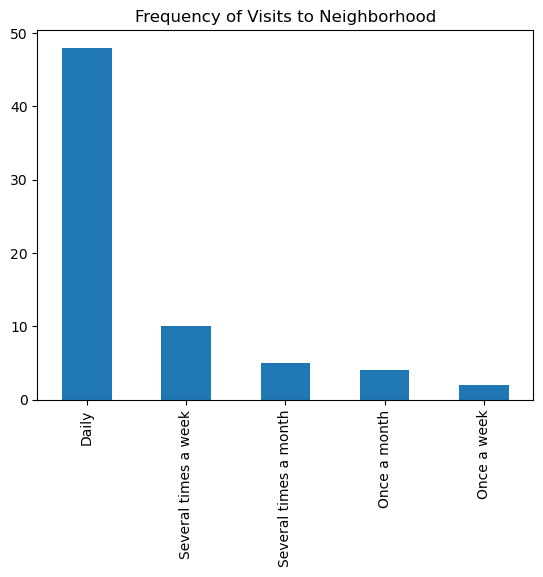

In [99]:
# Find the count for each visit frequency category and plot.
visit_frequency_count = hollywood_ped_data['visit_frequency'].value_counts()
visit_frequency_count.plot.bar(title = 'Frequency of Visits to Neighborhood')

<AxesSubplot: title={'center': 'Average Money Spent in Neighborhood Per Visit'}>

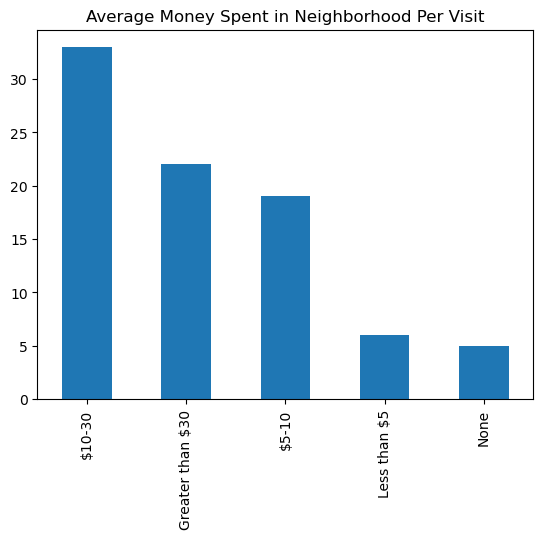

In [100]:
# Find the count for each money spent category and plot.
money_spent_count = hollywood_ped_data['avg_money_spent_per_visit'].value_counts()
money_spent_count.plot.bar(title = 'Average Money Spent in Neighborhood Per Visit')

<AxesSubplot: title={'center': 'Average Time Spent in Neighborhood Per Visit'}>

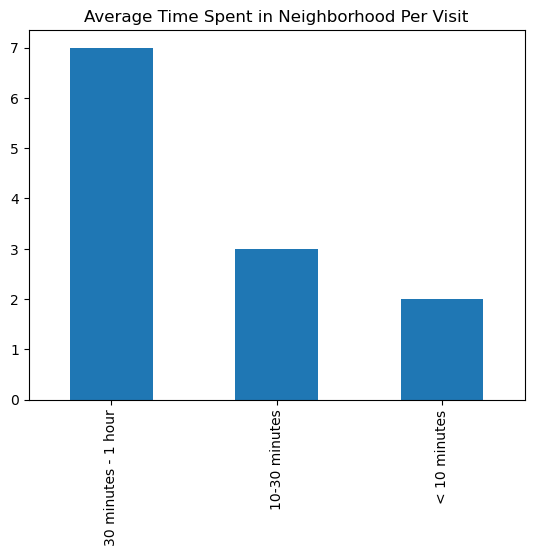

In [101]:
# Find the count for each time spent category and plot.
time_spent_count = hollywood_ped_data['avg_time_spent_per_visit'].value_counts()
time_spent_count.plot.bar(title = 'Average Time Spent in Neighborhood Per Visit')